# **Perceptrón**

Librerias de terceros necesarios:

- pandas
- numpy
- matplotlib
- sklearn
- tensorflow
- keras

In [31]:
#Importar librerías

#Procesamiento
import pandas as pd
from pandas import DataFrame
import numpy as np

# Graficacion
from matplotlib import pyplot

# Modelo
from sklearn.linear_model import Perceptron

#Métricas
from sklearn.metrics import accuracy_score, f1_score

#Cronometraje
import time

#Datasets
from keras.datasets import mnist

In [32]:

# Cargar datos (imagenes) ya en sus conjuntos de entrenamiento y de prueba

(X_train, y_train), (X_test,y_test) = mnist.load_data()

In [33]:
# Verificar que se cargaron bien
print('X_train: ' + str(X_train.shape))
print('Y_train: ' + str(y_train.shape))
print('X_test:  '  + str(X_test.shape))
print('Y_test:  '  + str(y_test.shape))

X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


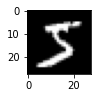

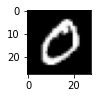

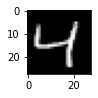

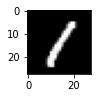

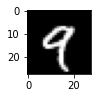

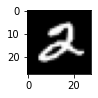

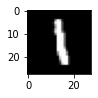

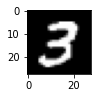

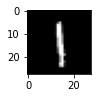

In [34]:
# Visualizamos las imagenes
for i in range(9):
    pyplot.subplot(330 + 1 + i)
    pyplot.imshow(X_train[i], cmap=pyplot.get_cmap('gray'))
    pyplot.show()

In [35]:
# Recorremos el dataset para aplanar las imagenes, tanto para X_train como X_test

imagenesTrain = []

for imagen in X_train:

    imagenesTrain += [imagen.flatten()]


imagenesTest  = []

for imagen in X_test:

    imagenesTest += [imagen.flatten()]

In [36]:
# Reasignamos a las variables el dataset con las imagenes aplanadas. Casteamos el dataset a DataFrame para hacer uso de sus metodos
X_train = DataFrame(imagenesTrain)
X_test = DataFrame(imagenesTest)

print(X_train.head())
print(X_test.head())

   0    1    2    3    4    5    6    7    8    9    ...  774  775  776  777  \
0    0    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
1    0    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
2    0    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
3    0    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
4    0    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   

   778  779  780  781  782  783  
0    0    0    0    0    0    0  
1    0    0    0    0    0    0  
2    0    0    0    0    0    0  
3    0    0    0    0    0    0  
4    0    0    0    0    0    0  

[5 rows x 784 columns]
   0    1    2    3    4    5    6    7    8    9    ...  774  775  776  777  \
0    0    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
1    0    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
2    0    0    0    0    0    0    0    0    0    0

In [37]:
# Adjuntamos las etiquetas correspondientes para poder revolver los datos
X_train.insert(X_train.shape[1],'etiqueta',y_train)
X_train = X_train.sample(frac=1)
print(X_train.head())

X_test.insert(X_test.shape[1],'etiqueta',y_test)
X_test = X_test.sample(frac=1)
print(X_test.head())

       0  1  2  3  4  5  6  7  8  9  ...  775  776  777  778  779  780  781  \
5297   0  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0   
32265  0  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0   
27569  0  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0   
49498  0  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0   
55552  0  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0   

       782  783  etiqueta  
5297     0    0         2  
32265    0    0         6  
27569    0    0         1  
49498    0    0         2  
55552    0    0         4  

[5 rows x 785 columns]
      0  1  2  3  4  5  6  7  8  9  ...  775  776  777  778  779  780  781  \
2098  0  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0   
9401  0  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0   
3444  0  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0   
6019  0  0  0  0  0  

In [38]:
# Volvemos a separar los datos en imagen y etiqueta
y_train = X_train['etiqueta']
X_train = X_train[X_train.columns[:-1]]

y_test = X_test['etiqueta']
X_test = X_test[X_test.columns[:-1]]

In [39]:
# Utilizamos la configuracion default de la clase

model = Perceptron() # Instanciamos la clase

# Iniciamos cronometraje
start = time.perf_counter()

model.fit(X_train,y_train) # Entrenamos la clase con el set de entrenamiento

# Paramos el cronometraje
tiempo = time.perf_counter() - start

yTecho = model.predict(X_test) # Predecimos y le pasamos las observaciones reales

In [40]:
# Calculamos el rendimiento del modelo, medimos:
# Tiempo de ejecución
# Tasa de aciertos
# Puntaje F1

accuracy = accuracy_score (y_test,yTecho)
f1score = f1_score(y_test,yTecho, average="micro",zero_division=True)

In [41]:
# Reporte

print("Tiempo de ejecución: ",tiempo,"segundos")
print("Tasa de aciertos:",str(accuracy*100)+"%")
print("Puntaje F1:",f1score)
print('-'*50)

Tiempo de ejecución:  9.964737899999818 segundos
Tasa de aciertos: 89.2%
Puntaje F1: 0.892
--------------------------------------------------


# **Referencias**

- https://www.askpython.com/python/examples/load-and-plot-mnist-dataset-in-python

- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html